In [42]:
import scipy.stats as stats 
from scipy.special import beta # beta function
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

Mode of posterior beta is at 11/13 =  0.9090909090909091


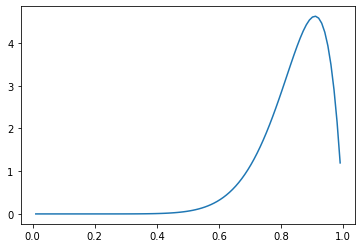

In [43]:
a, b = 1, 1
N1, N0 = 10, 1

mode = (N1 + a - 1) / (N1 + N0 + a + b -2)
print(f"Mode of posterior beta is at {N1+a}/{N1+N0+a+b} = ", mode)

x = np.linspace(0.01, 0.99, 100)
posterior = stats.beta(N1+a, N0+b).pdf(x)
plt.plot(x, posterior);

In [47]:
am = np.argmax(posterior)
x[am], mode
that = x[am]  # this corresponds to a argmax P(th, D) presumably ^^
that = mode 

$$
    H(\hat\theta) = -\frac{N_1+a-1}{\hat\theta^2} + \frac{N_0+b-1}{(1-\hat\theta)^2}
$$
$$
    \hat p(\theta|D) = \frac{1}{Z} \hat p(\theta, D) = \mathcal{N}(\theta| \hat\theta, H^{-1})
$$
$$
    Z = e^{-\log p(\hat\theta, D)} (2\pi)^{1/2} |H|^{-1/2}
$$

In [59]:
H = (N1+a-1)/that**2 + (N0+b-1)/(1-that)**2; H # inv of variance
std = 1./ np.sqrt(H) ; 
g = - (N1+a-1)/that + (N0+b-1)/(1-that)
L = - ( (N1+a-1) * np.log(that)  +  (N0+b-1) * np.log(1-that) );   # -log p(th, D) = -log p(D|th) - log p(th)
print(H, "std: ", std, "g: ", g, L)

131.04284169213307 std:  0.0873561225432932 g:  -0.10445292420763685 3.3510384844594094


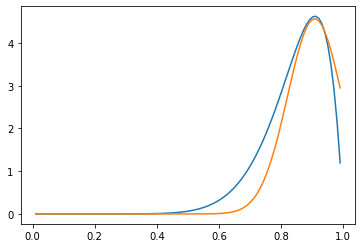

In [57]:
quad = stats.norm(that, scale=std).pdf(x)

plt.plot(x, posterior)
plt.plot(x, quad);

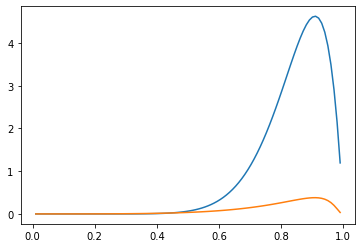

In [100]:
def logit(th):
    return np.log(th/(1-th))
def expit(a):
    return 1/(1+np.exp(-a))

a = logit(x)
pdfa = stats.norm(loc=logit(that), scale=1.05).pdf(a)
dtda = expit(a) * (1 - expit(a))
# pdfa = pdfa * dtda

plt.plot(x, posterior)
# plt.plot(x, quad);
plt.plot(x, pdfa )

In [101]:
np.argmax(pdfa), np.argmax(posterior)

(91, 91)

In [84]:
logit(that)

2.293052341245749

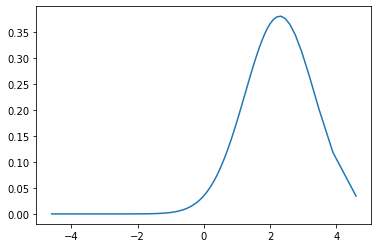

In [87]:
plt.plot(a, stats.norm(loc=logit(that), scale=1.05).pdf(a))

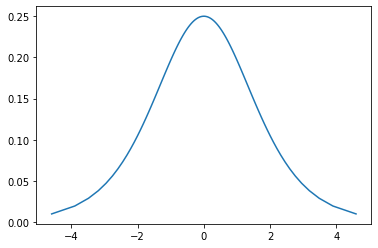

In [91]:
plt.plot(a, dtda)

In [97]:
logit(0.0001), logit(0.999)

(-9.21024036697585, 6.906754778648553)